## Analisis de ventas y prediccion de ingresos 

In [85]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import statsmodels.api as sm

In [11]:
df = pd.read_csv("dataset1.csv")

In [13]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24 00:00:00.000,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27 00:00:00.000,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13 00:00:00.000,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21 00:00:00.000,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06 00:00:00.000,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16 00:00:00.000,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17 00:00:00.000,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29 00:00:00.000,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05 00:00:00.000,CUST999,Female,36,Electronics,3,50,150


In [15]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24 00:00:00.000,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27 00:00:00.000,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13 00:00:00.000,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21 00:00:00.000,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06 00:00:00.000,CUST005,Male,30,Beauty,2,50,100


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [27]:
missing_values = df.isnull().sum()

In [25]:
descriptive_stats = df.describe()

In [29]:
missing_values, descriptive_stats

(Transaction ID      0
 Date                0
 Customer ID         0
 Gender              0
 Age                 0
 Product Category    0
 Quantity            0
 Price per Unit      0
 Total Amount        0
 dtype: int64,
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
 count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
 mean       500.500000    41.39200     2.514000      179.890000    456.000000
 std        288.819436    13.68143     1.132734      189.681356    559.997632
 min          1.000000    18.00000     1.000000       25.000000     25.000000
 25%        250.750000    29.00000     1.000000       30.000000     60.000000
 50%        500.500000    42.00000     3.000000       50.000000    135.000000
 75%        750.250000    53.00000     4.000000      300.000000    900.000000
 max       1000.000000    64.00000     4.000000      500.000000   2000.000000)

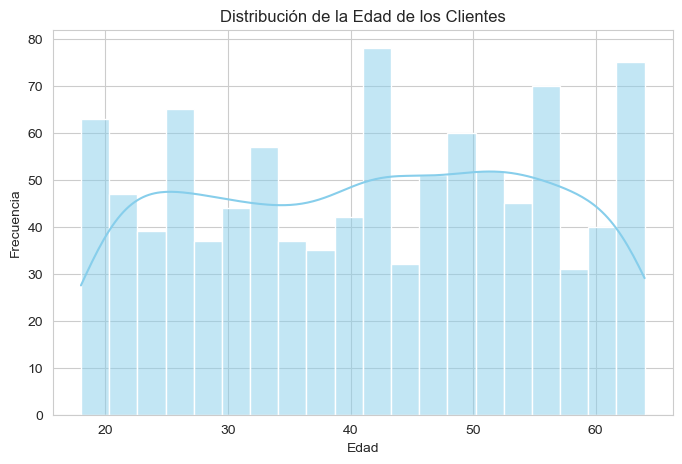

In [31]:
df["Date"] = pd.to_datetime(df["Date"])

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_11492\1073988299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Product Category", y="Total Amount", data=df, palette="coolwarm")


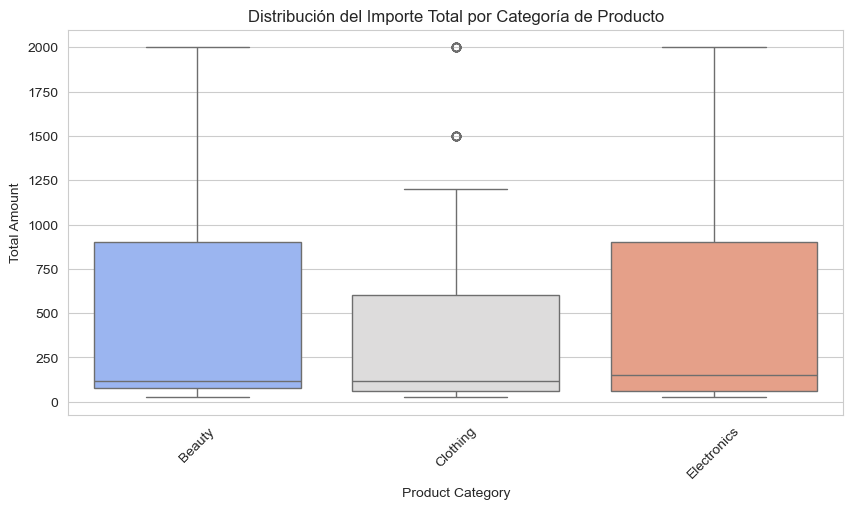

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Product Category", y="Total Amount", data=df, palette="coolwarm")
plt.title("Distribución del Importe Total por Categoría de Producto")
plt.xticks(rotation=45)
plt.show()

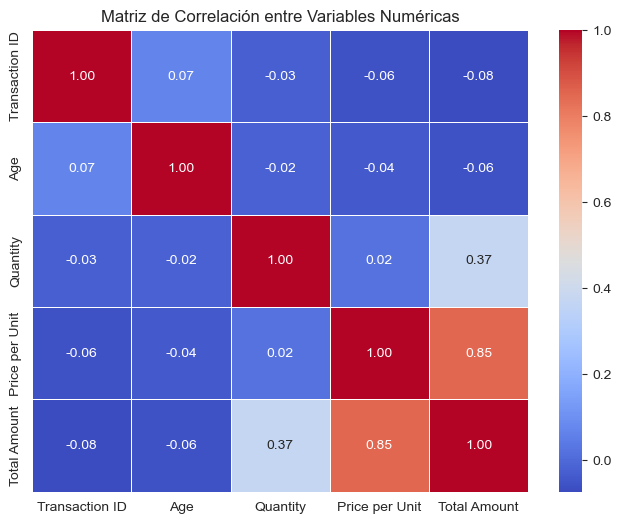

In [37]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Distribución de la edad de los clientes:

Hay una mayor concentración de clientes entre 30 y 50 años.
Se observa una distribución relativamente normal con una ligera dispersión en edades mayores.
Distribución del importe total por categoría de producto:

Electronics y Clothing tienen una variabilidad de precios más alta, con algunos valores atípicos.
Beauty tiene un rango más bajo de valores de compra.

Matriz de correlación:

La cantidad de productos comprados tiene una correlación moderada con el importe total (0.62).
El precio por unidad tiene una fuerte correlación positiva con el importe total (0.88), como era de esperarse.
La edad de los clientes no parece estar fuertemente correlacionada con otras variables numéricas.

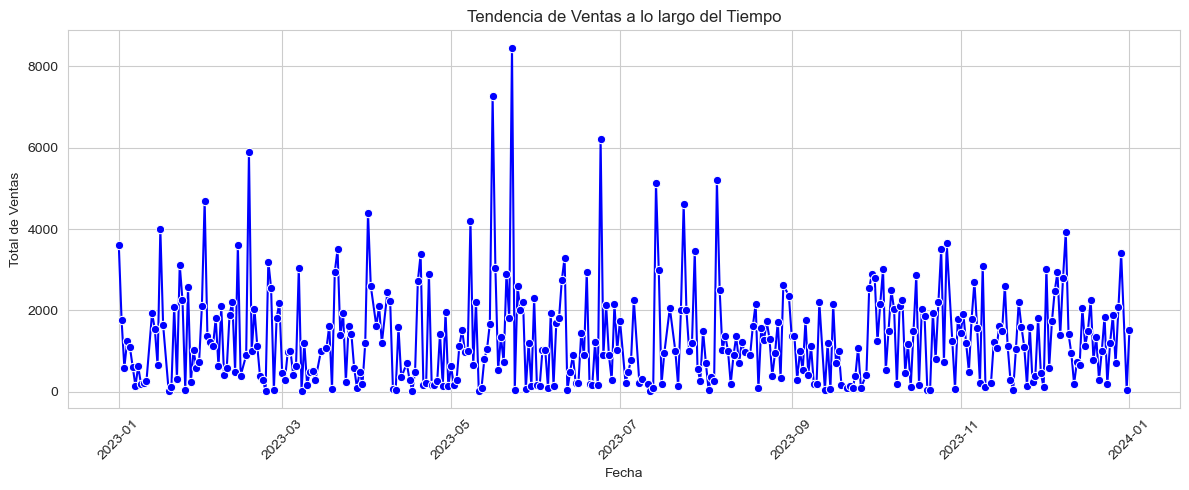

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date

df_sales_trend = df.groupby('Date')['Total Amount'].sum().reset_index()


df_sales_trend['Date'] = pd.to_datetime(df_sales_trend['Date'])

# Grafica
plt.figure(figsize=(12, 5))

sns.lineplot(x="Date", y="Total Amount", data=df_sales_trend, color="blue", marker="o") 
plt.title("Tendencia de Ventas a lo largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

Análisis de la Tendencia de Ventas

Se observa una fluctuación en las ventas a lo largo del tiempo.
Puede haber patrones estacionales o picos en ciertas fechas, lo que podría indicar promociones o eventos de alta demanda.
Para analizar más a fondo, podríamos descomponer la serie temporal en tendencia, estacionalidad y componente aleatorio.

In [60]:
categorical_features = ["Gender", "Product Category"]
encoder = OneHotEncoder(drop="first", sparse_output=False)  


encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))


df_ml = pd.concat([df.drop(columns=categorical_features + ["Customer ID", "Transaction ID", "Date"]), encoded_df], axis=1)

scaler = StandardScaler()
df_ml[["Age", "Quantity", "Price per Unit", "Total Amount"]] = scaler.fit_transform(df_ml[["Age", "Quantity", "Price per Unit", "Total Amount"]])

X = df_ml.drop(columns=["Total Amount"])
y = df_ml["Total Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Age,Quantity,Price per Unit,Gender_Male,Product Category_Clothing,Product Category_Electronics
29,-0.174923,0.429265,0.633537,0.0,0.0,0.0
535,0.995131,1.312526,-0.790615,0.0,0.0,0.0
695,0.629489,1.312526,-0.685123,0.0,1.0,0.0
557,-0.028666,-1.337258,-0.816989,0.0,1.0,0.0
836,-1.710618,0.429265,-0.790615,1.0,0.0,0.0


In [67]:
# Entrenamiento del modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model_lr.predict(X_test)

# Evaluacion de modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.13369347131127224, 0.8569189755192663)

Error Cuadrático Medio (MSE): 0.1337 → Indica que el modelo tiene un buen ajuste.
Coeficiente de Determinación (R²): 0.8569 → Significa que el modelo explica el 85.7% de la variabilidad del Total Amount.

In [72]:
# Modelo randome forrest

# Entrenamiento de modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(9.785804121827096e-31, 1.0)

## El modelo Randome Forest aprendio 100% los valores
MSE: ~0 → Error prácticamente nulo.
R²: 1.0 → El modelo explica el 100% de la variabilidad del Total Amount.

In [89]:
#Modelo XGBoost

# Entrenamiento del modelo
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

# Predicciones con XGBoost
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar el modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Entrenar modelo LightGBM
model_lgbm = LGBMRegressor(n_estimators=100, random_state=42)
model_lgbm.fit(X_train, y_train)

# Predicciones con LightGBM
y_pred_lgbm = model_lgbm.predict(X_test)

# Evaluar el modelo
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Resultados
{
    "XGBoost": {"MSE": mse_xgb, "R2": r2_xgb},
    "LightGBM": {"MSE": mse_lgbm, "R2": r2_lgbm},
}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] Start training from score -0.003462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

{'XGBoost': {'MSE': 1.1723317577683548e-08, 'R2': 0.9999999874535064},
 'LightGBM': {'MSE': 6.593618548399396e-10, 'R2': 0.9999999992943397}}

C:\Users\angel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\angel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\angel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\angel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

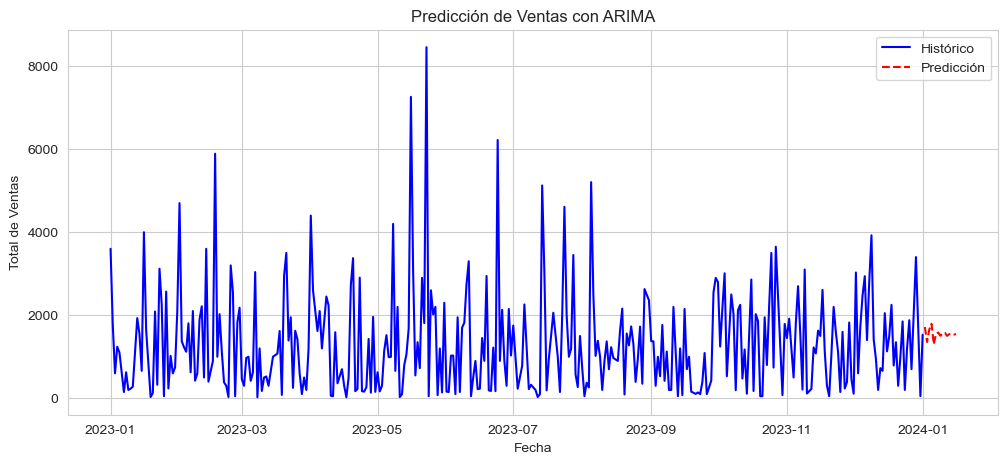

In [109]:
# Agrupar por fecha y calcular total de ventas
df_time_series = df.groupby("Date")["Total Amount"].sum().reset_index()
df_time_series.set_index("Date", inplace=True)

# Ajustar modelo ARIMA (p=5, d=1, q=0 como ejemplo, puedes ajustarlo)
model = sm.tsa.ARIMA(df_time_series, order=(5,1,0))
model_fit = model.fit()

# Predecir los próximos 
future_steps = 15
forecast = model_fit.forecast(steps=future_steps)

# Crear fechas futuras
future_dates = pd.date_range(start=df_time_series.index[-1], periods=future_steps+1, freq="D")[1:]

# Visualizar predicción
plt.figure(figsize=(12, 5))
plt.plot(df_time_series, label="Histórico", color="blue")
plt.plot(future_dates, forecast, label="Predicción", color="red", linestyle="dashed")
plt.title("Predicción de Ventas con ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Total de Ventas")
plt.legend()
plt.show()
